# Predicting the price of Used Cars
Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one.

Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Let’s see if your data science skills can help you predict the price of a used car based on a given set of features discussed below.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df_test  = pd.read_excel("Data_Test.xlsx")

In [4]:
df.shape

(6019, 13)

In [5]:
df_test.shape

(1234, 12)

Test data doesn't have the price column which we have to predict

In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,6019
Total Missing (%),6.8%
Total size in memory,611.4 KiB
Average record size in memory,104.0 B
Numeric,4
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df_test)

Number of variables,12
Number of observations,1234
Total Missing (%),7.3%
Total size in memory,115.8 KiB
Average record size in memory,96.1 B
Numeric,3
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Looks like both test and train data have missing values which we have to address

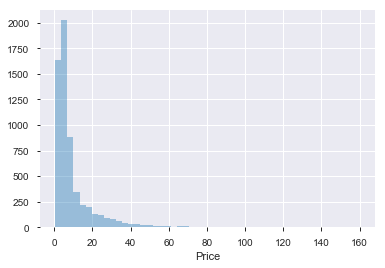

In [11]:
sns.distplot(df["Price"],bins=50,kde=False)

# Checking cars by year wise

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

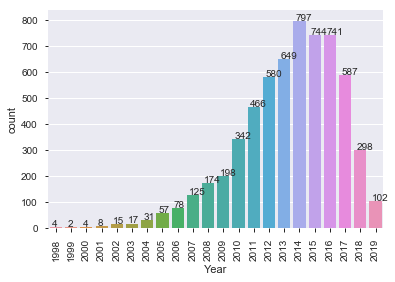

In [18]:
ax = sns.countplot("Year",data=df)
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)

# Cleaning the Train Data 

##  Clean Seats

In [12]:
df["Seats"].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

0 seats is not possible we need to fix it

In [13]:
df[df["Name"] == "Audi A4 3.2 FSI Tiptronic Quattro"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [14]:
df.loc[df.Seats == 0, 'Seats'] = 5.0

# Normalize Fuel Type

In [22]:
df["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

We will merge electric LPG and CNG as Bio Fuel

In [23]:
df.loc[df.Fuel_Type == "CNG", 'Fuel_Type'] = "Bio"
df.loc[df.Fuel_Type == "LPG", 'Fuel_Type'] = "Bio"
df.loc[df.Fuel_Type == "Electric" , 'Fuel_Type'] = "Bio"

In [24]:
df["Fuel_Type"].value_counts()

Diesel    3205
Petrol    2746
Bio         68
Name: Fuel_Type, dtype: int64

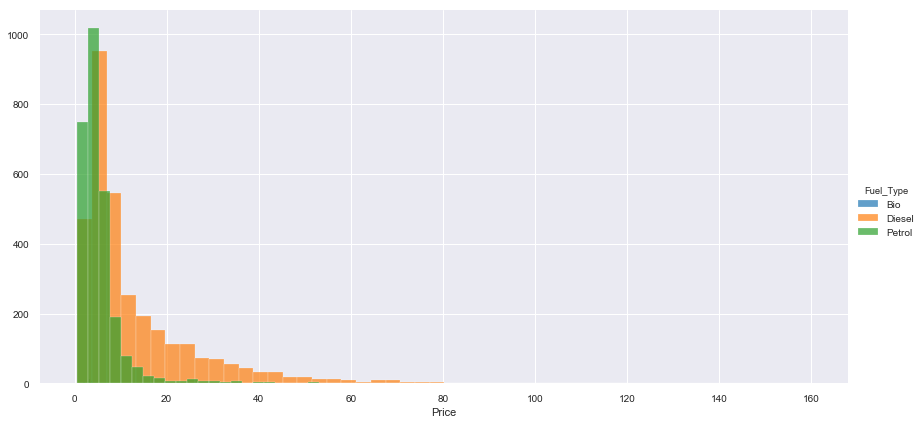

In [25]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Fuel_Type",height=6,aspect=2)
g = g.map(plt.hist,'Price',bins=50,alpha=0.7).add_legend()

It is evident in the higher segmnet Diesel Cars are more costly than petrol

# Exploring Cars by Location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

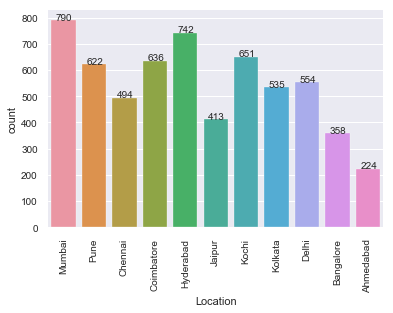

In [26]:
ax = sns.countplot(df["Location"])
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)

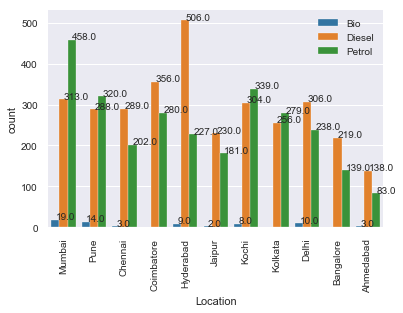

In [27]:
ax = sns.countplot("Location",data=df,hue="Fuel_Type")
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)
ax.legend(loc=1)

# Addressing the missing values <br>
Total empty cells by column : <br>
 Name                    0<br>
Location                0<br>
Year                    0<br>
Kilometers_Driven       0<br>
Fuel_Type               0<br>
Transmission            0<br>
Owner_Type              0<br>
Mileage                 2<br>
Engine                 36<br>
Power                  36<br>
Seats                  42<br>
New_Price            5195<br>
Price                   0<br>

In [28]:
df.shape

(6019, 13)

Out of 6019 values in the dataset New Price has missing 5195 values , hence this column is of no use in the dataset

## Mileage

In [29]:
df[df["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Bio,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Bio,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


Mileage of these 2 cars is not in the dataset and is also not available online , hence we will drop it

In [30]:
df = df.drop([4446,4904],axis=0)

## Engine and Power

In [32]:
df[df["Engine"].isnull()].head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11


Looks like engine and power are simultaneously missing in the dataset , we will fill these value via google search of these car's specification

In [33]:
df.loc[df.Name == "Honda City 1.5 GXI", 'Power'] = "100 bhp"
df.loc[df.Name == "Honda City 1.5 GXI", 'Engine'] = "1493 CC"
df.loc[df.Name == "Maruti Swift 1.3 VXi", 'Power'] = "84 bhp"
df.loc[df.Name == "Maruti Swift 1.3 VXi", 'Engine'] = "1197 CC"
df.loc[df.Name == "BMW 5 Series 520d Sedan", 'Power'] = "190 bhp"
df.loc[df.Name == "BMW 5 Series 520d Sedan", 'Engine'] = "1995 CC"
df.loc[df.Name == "Maruti Wagon R Vx", 'Power'] = "82 bhp"
df.loc[df.Name == "Maruti Wagon R Vx", 'Engine'] = "998 CC"
df.loc[df.Name == "Fiat Punto 1.2 Dynamic", 'Power'] = "67 bhp"
df.loc[df.Name == "Fiat Punto 1.2 Dynamic", 'Engine'] = "1172 CC"
df.loc[df.Name == "Fiat Punto 1.4 Emotion", 'Power'] = "89 bhp"
df.loc[df.Name == "Fiat Punto 1.4 Emotion", 'Engine'] = "1368 CC"
df.loc[df.Name == "Hyundai Santro Xing XG", 'Power'] = "63 bhp"
df.loc[df.Name == "Hyundai Santro Xing XG", 'Engine'] = "1086 CC"
df.loc[df.Name == "Honda Jazz Select Edition", 'Power'] = "88.8 bhp"
df.loc[df.Name == "Honda Jazz Select Edition", 'Engine'] = "1198 CC"
df.loc[df.Name == "Land Rover Range Rover 3.0 D", 'Power'] = "244 bhp"
df.loc[df.Name == "Land Rover Range Rover 3.0 D", 'Engine'] = "2993 CC"
df.loc[df.Name == "Honda CR-V AT With Sun Roof", 'Power'] = "118 bhp"
df.loc[df.Name == "Honda CR-V AT With Sun Roof", 'Engine'] = "1997 CC"
df.loc[df.Name == "Hyundai Santro GLS II - Euro II", 'Power'] = "82 bhp"
df.loc[df.Name == "Hyundai Santro GLS II - Euro II", 'Engine'] = "1197 CC"
df.loc[df.Name == "Toyota Etios Liva V", 'Power'] = "78.9 bhp"
df.loc[df.Name == "Toyota Etios Liva V", 'Engine'] = "1197 CC"
df.loc[df.Name == "Honda City 1.3 DX", 'Power'] = "90 bhp"
df.loc[df.Name == "Honda City 1.3 DX", 'Engine'] = "1298 CC"
df.loc[df.Name == "Maruti Swift 1.3 ZXI", 'Power'] = "82 bhp"
df.loc[df.Name == "Maruti Swift 1.3 ZXI", 'Engine'] = "1197 CC"
df.loc[df.Name == "Land Rover Range Rover Sport 2005 2012 Sport", 'Power'] = "503 bhp"
df.loc[df.Name == "Land Rover Range Rover Sport 2005 2012 Sport", 'Engine'] = "4999 CC"
df.loc[df.Name == "Maruti Swift 1.3 LXI", 'Power'] = "74 bhp"
df.loc[df.Name == "Maruti Swift 1.3 LXI", 'Engine'] = "1197 CC"
df.loc[df.Name == "Hyundai Santro LP zipPlus", 'Power'] = "82 bhp"
df.loc[df.Name == "Hyundai Santro LP zipPlus", 'Engine'] = "1197 CC"
df.loc[df.Name == "Maruti Swift 1.3 VXI ABS", 'Power'] = "82 bhp"
df.loc[df.Name == "Maruti Swift 1.3 VXI ABS", 'Engine'] = "1197 CC"
df.loc[df.Name == "Fiat Punto 1.3 Emotion", 'Power'] = "91.7 bhp"
df.loc[df.Name == "Fiat Punto 1.3 Emotion", 'Engine'] = "1248 CC"

## Cleaning Seats

In [36]:
df[df["Seats"].isnull()].head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,1493 CC,100 bhp,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,1197 CC,84 bhp,NaN,NaN,2.11


In [37]:
df.loc[df.Name == "Maruti Swift 1.3 LXI", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Swift 1.3 VXi", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Swift 1.3 VXI ABS", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Swift 1.3 ZXI", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Swift 1.3 ZXI", 'Seats'] = 5.0
df.loc[df.Name == "Fiat Punto 1.3 Emotion", 'Seats'] = 5.0
df.loc[df.Name == "Fiat Punto 1.2 Dynamic", 'Seats'] = 5.0
df.loc[df.Name == "Fiat Punto 1.4 Emotion", 'Seats'] = 5.0
df.loc[df.Name == "Honda City 1.3 DX", 'Seats'] = 5.0
df.loc[df.Name == "Honda City 1.5 GXI", 'Seats'] = 5.0
df.loc[df.Name == "Honda City 1.5 EXI", 'Seats'] = 5.0
df.loc[df.Name == "Hyundai Santro LP zipPlus", 'Seats'] = 5.0
df.loc[df.Name == "Hyundai Santro GLS II - Euro II", 'Seats'] = 5.0
df.loc[df.Name == "Hyundai Santro Xing XG", 'Seats'] = 5.0
df.loc[df.Name == "Honda CR-V AT With Sun Roof", 'Seats'] = 5.0
df.loc[df.Name == "Honda Jazz Select Edition", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Estilo LXI", 'Seats'] = 5.0
df.loc[df.Name == "Maruti Wagon R Vx", 'Seats'] = 5.0
df.loc[df.Name == "BMW 5 Series 520d Sedan", 'Seats'] = 5.0
df.loc[df.Name == "Land Rover Range Rover 3.0 D", 'Seats'] = 5.0
df.loc[df.Name == "Ford Figo Diesel", 'Seats'] = 4.0
df.loc[df.Name == "Toyota Etios Liva V", 'Seats'] = 5.0
df.loc[df.Name == "Land Rover Range Rover Sport 2005 2012 Sport", 'Seats'] = 5.0
df.loc[df.Name == "Ford Endeavour Hurricane LE", 'Seats'] = 5.0

### Clean Engine Power Mileage by removing km/kg cc bhp and kmpl

In [39]:
df["Mileage"] = df["Mileage"].apply(lambda x: x.replace('km/kg',''))
df["Mileage"] = df["Mileage"].apply(lambda x: x.replace('kmpl',''))
df["Power"] = df["Power"].apply(lambda x: x.replace('bhp',''))
df["Engine"] = df["Engine"].apply(lambda x: x.replace('CC',''))

In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,Bio,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


### Looks like some places in the data power is written as null

In [43]:
df[df.Power.str.contains("null")].shape

(107, 13)

Addressing these 107 values , doing a google search for all these cars

In [ ]:
df.loc[df.Name == "Maruti Swift VDI BSIV", 'Power'] = 74
df.loc[df.Name == "Maruti Baleno Vxi", 'Power'] = 94
df.loc[df.Name == "Maruti Swift VDI BSIV W ABS", 'Power'] = 83.1
df.loc[df.Name == "Maruti Estilo LXI", 'Power'] = 67.1
df.loc[df.Name == "Maruti Esteem Vxi", 'Power'] = 84
df.loc[df.Name == "Maruti 1000 AC", 'Power'] = 60
df.loc[df.Name == "Maruti Baleno LXI - BSIII", 'Power'] = 94
df.loc[df.Name == "Maruti Esteem LX BSII", 'Power'] = 91
df.loc[df.Name == "Hyundai Santro Xing XO eRLX Euro II", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XO", 'Power'] = 62
df.loc[df.Name == "Hyundai Santro Xing XL eRLX Euro III", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XL", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XP", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro LP - Euro II", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XL AT eRLX Euro III", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro GLS I - Euro I", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XO CNG", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro GS zipDrive - Euro II", 'Power'] = 55
df.loc[df.Name == "Hyundai Santro Xing XL AT eRLX Euro II", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro GS", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro Xing XG eRLX Euro III", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro AT", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro GLS I - Euro II", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro DX", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro DX", 'Power'] = 63
df.loc[df.Name == "Hyundai Santro LS zipPlus", 'Power'] = 63
df.loc[df.Name == "Tata Indica DLS", 'Power'] = 55.23
df.loc[df.Name == "Toyota Etios Liva G", 'Power'] = 78.9
df.loc[df.Name == "Toyota Etios GD", 'Power'] = 67
df.loc[df.Name == "Toyota Qualis RS E2", 'Power'] = 75
df.loc[df.Name == "Toyota Qualis Fleet A3", 'Power'] = 75
df.loc[df.Name == "Toyota Etios Liva GD", 'Power'] = 78.9
df.loc[df.Name == "Nissan Micra Diesel", 'Power'] = 63.12
df.loc[df.Name == "Nissan Teana 230jM", 'Power'] = 170
df.loc[df.Name == "Mahindra Bolero ZLX", 'Power'] = 62
df.loc[df.Name == "Mahindra Jeep MM 550 PE", 'Power'] = 62
df.loc[df.Name == "Mahindra Jeep MM 540 DP", 'Power'] = 62
df.loc[df.Name == "Mercedes-Benz E-Class 220 CDI", 'Power'] = 192
df.loc[df.Name == "Honda CR-V Sport", 'Power'] = 118
df.loc[df.Name == "Ford Endeavour XLT TDCi 4X4", 'Power'] = 197
df.loc[df.Name == "Ford Endeavour Hurricane LE", 'Power'] = 154
df.loc[df.Name == "Ford Fiesta 1.6 SXI ABS Duratec", 'Power'] = 101
df.loc[df.Name == "Skoda Laura Classic 1.8 TSI", 'Power'] = 158
df.loc[df.Name == "Audi A4 3.2 FSI Tiptronic Quattro", 'Power'] = 252
df.loc[df.Name == "Fiat Petra 1.2 EL", 'Power'] = 72
df.loc[df.Name == "Fiat Siena 1.2 ELX", 'Power'] = 72
df.loc[df.Name == "Porsche Cayman 2009-2012 S", 'Power'] = 320
df.loc[df.Name == "Porsche Cayman 2009-2012 S tiptronic", 'Power'] = 320
df.loc[df.Name == "Volkswagen Jetta 2007-2011 1.9 L TDI", 'Power'] = 105
df.loc[df.Name == "Smart Fortwo CDI AT", 'Power'] = 44
df.loc[df.Name == "Chevrolet Optra 1.6 Elite", 'Power'] = 104
df.loc[df.Name == "Ford Fiesta 1.4 SXi TDCi", 'Power'] = 68

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6017 non-null object
Location             6017 non-null object
Year                 6017 non-null int64
Kilometers_Driven    6017 non-null int64
Fuel_Type            6017 non-null object
Transmission         6017 non-null object
Owner_Type           6017 non-null object
Mileage              6017 non-null object
Engine               6017 non-null object
Power                6017 non-null object
Seats                6017 non-null float64
New_Price            823 non-null object
Price                6017 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.1+ KB


Engine Power and Mileage are all three object types , we convert them to float

In [51]:
df['Power'] = df['Power'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [53]:
df[df["Mileage"] == 0.0].shape

(68, 13)

In [54]:
df[df["Power"] == 0.0].shape

(0, 13)

In [55]:
df[df["Engine"] == 0.0].shape

(0, 13)

Looks like 68 values of Mileage are 0 we need to fix it , google searching the data for mileage for these cars

In [119]:
df.loc[df.Name == "Land Rover Freelander 2 TD4 SE", 'Mileage'] = 12.39
df.loc[df.Name == "Land Rover Freelander 2 TD4 S", 'Mileage'] = 12.39
df.loc[df.Name == "Land Rover Freelander 2 TD4 HSE", 'Mileage'] = 12.39
df.loc[df.Name == "Mercedes-Benz C-Class Progressive C 220d", 'Mileage'] = 12.6
df.loc[df.Name == "Hyundai Santro Xing XL", 'Mileage'] = 17.0
df.loc[df.Name == "Honda City 1.5 GXI", 'Mileage'] = 12.8
df.loc[df.Name == "Ford Figo Diesel", 'Mileage'] = 20.0
df.loc[df.Name == "Volkswagen Jetta 2007-2011 1.9 L TDI", 'Mileage'] = 15.5
df.loc[df.Name == "Hyundai Santro GLS I - Euro I", 'Mileage'] = 17.0
df.loc[df.Name == "Hyundai Santro GLS I - Euro II", 'Mileage'] = 17.0
df.loc[df.Name == "Mercedes-Benz New C-Class Progressive C 200", 'Mileage'] = 12.06
df.loc[df.Name == "Hyundai Santro LS zipPlus", 'Mileage'] = 20.3
df.loc[df.Name == "Hyundai Santro Xing XP", 'Mileage'] = 17.92
df.loc[df.Name == "Mercedes-Benz M-Class ML 350 4Matic", 'Mileage'] = 13
df.loc[df.Name == "Land Rover Range Rover 3.0 D", 'Mileage'] = 13.33
df.loc[df.Name == "Smart Fortwo CDI AT", 'Mileage'] = 25.17
df.loc[df.Name == "Hyundai Santro Xing GL", 'Mileage'] = 17.92
df.loc[df.Name == "Maruti Baleno Vxi", 'Mileage'] = 12.0
df.loc[df.Name == "Land Rover Range Rover Sport 2005 2012 Sport", 'Mileage'] = 12.65
df.loc[df.Name == "Hyundai Santro DX", 'Mileage'] = 17.0
df.loc[df.Name == "Mahindra Jeep MM 550 PE", 'Mileage'] = 13.0
df.loc[df.Name == "Mahindra Jeep MM 540 DP", 'Mileage'] = 13.0
df.loc[df.Name == "Hyundai Santro LP zipPlus", 'Mileage'] = 20.3
df.loc[df.Name == "Toyota Qualis RS E2", 'Mileage'] = 13.2
df.loc[df.Name == "Toyota Qualis Fleet A3", 'Mileage'] = 13.2
df.loc[df.Name == "Hyundai Santro AT", 'Mileage'] = 20.3
df.loc[df.Name == "Hyundai Santro GLS II - Euro II", 'Mileage'] = 17.0
df.loc[df.Name == "Skoda Superb 3.6 V6 FSI", 'Mileage'] = 6.6
df.loc[df.Name == "Hyundai Santro GS", 'Mileage'] = 14.0
df.loc[df.Name == "Hyundai Santro GS zipDrive - Euro II", 'Mileage'] = 20.3
df.loc[df.Name == "Fiat Siena 1.2 ELX", 'Mileage'] = 11.9
df.loc[df.Name == "Hyundai Santro LP - Euro II", 'Mileage'] = 20.3
df.loc[df.Name == "Audi A7 2011-2015 Sportback", 'Mileage'] = 13.88

## Normalize the Name Column

In [122]:
df.loc[df['Name'].str.contains("Maruti"), "Name"] = "Maruti"
df.loc[df['Name'].str.contains("Hyundai"), "Name"] = "Hyundai"
df.loc[df['Name'].str.contains("Honda"), "Name"] = "Honda"
df.loc[df['Name'].str.contains("Audi"), "Name"] = "Audi"
df.loc[df['Name'].str.contains("Tata"), "Name"] = "Tata"
df.loc[df['Name'].str.contains("Nissan"), "Name"] = "Nissan"
df.loc[df['Name'].str.contains("Toyota"), "Name"] = "Toyota"
df.loc[df['Name'].str.contains("Mahindra"), "Name"] = "Mahindra"
df.loc[df['Name'].str.contains("Ford"), "Name"] = "Ford"
df.loc[df['Name'].str.contains("Skoda"), "Name"] = "Skoda"
df.loc[df['Name'].str.contains("Fiat"), "Name"] = "Fiat"
df.loc[df['Name'].str.contains("Porsche"), "Name"] = "Porsche"
df.loc[df['Name'].str.contains("Volkswagen"), "Name"] = "Volkswagen"
df.loc[df['Name'].str.contains("Chevrolet"), "Name"] = "Chevrolet"
df.loc[df['Name'].str.contains("BMW"), "Name"] = "BMW"
df.loc[df['Name'].str.contains("Mercedes"), "Name"] = "Mercedes"
df.loc[df['Name'].str.contains("Jaguar"), "Name"] = "Jaguar"
df.loc[df['Name'].str.contains("Land Rover"), "Name"] = "Land Rover"
df.loc[df['Name'].str.contains("Renault"), "Name"] = "Renault"
df.loc[df['Name'].str.contains("Mitsubishi"), "Name"] = "Mitsubishi"
df.loc[df['Name'].str.contains("Datsun"), "Name"] = "Nissan"
df.loc[df['Name'].str.contains("Volvo"), "Name"] = "Volvo"
df.loc[df['Name'].str.contains("Mini Cooper"), "Name"] = "BMW"
df.loc[df['Name'].str.contains("Mini Countryman Cooper"), "Name"] = "BMW"
df.loc[df['Name'].str.contains("Mini Clubman Cooper"), "Name"] = "BMW"
df.loc[df['Name'].str.contains("Jeep Compass"), "Name"] = "Jeep Compass"
df.loc[df['Name'].str.contains("Lamborghini"), "Name"] = "Audi"
df.loc[df['Name'].str.contains("Bentley"), "Name"] = "Audi"
df.loc[df['Name'].str.contains("Isuzu"), "Name"] = "Isuzu"
df.loc[df['Name'].str.contains("ISUZU"), "Name"] = "Isuzu"
df.loc[df['Name'].str.contains("ISUZU"), "Name"] = "Isuzu"
df.loc[df['Name'].str.contains("Force One"), "Name"] = "Others"
df.loc[df['Name'].str.contains("Smart Fortwo"), "Name"] = "Others"
df.loc[df['Name'].str.contains("Ambassador"), "Name"] = "Others"

### Dropping the New_price column

In [124]:
df.drop(["New_Price"],axis=1,inplace=True)

In [125]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,Bio,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
y = df["Price"]
df.drop(["Price"],axis=1,inplace=True)

In [130]:
X = pd.get_dummies(df, columns=['Name', 'Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)

In [131]:
X.shape

(6017, 45)

# Cleaning the Test Data Set

In [132]:
df_test  = pd.read_excel("Data_Test.xlsx")

In [133]:
df_test.shape

(1234, 12)

In [135]:
df_test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN


### Filling null values of Engine Power and Seats

In [136]:
df_test.loc[df_test.Name == "Skoda Laura 1.8 TSI Ambition", 'Power'] = "158 bhp"
df_test.loc[df_test.Name == "Skoda Laura 1.8 TSI Ambition", 'Engine'] = "1798 CC"
df_test.loc[df_test.Name == "Skoda Laura 1.8 TSI Ambition", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Toyota Etios Liva Diesel TRD Sportivo", 'Power'] = "67 bhp"
df_test.loc[df_test.Name == "Toyota Etios Liva Diesel TRD Sportivo", 'Engine'] = "1364 CC"
df_test.loc[df_test.Name == "Toyota Etios Liva Diesel TRD Sportivo", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Hyundai i20 new Sportz AT 1.4", 'Power'] = "99 bhp"
df_test.loc[df_test.Name == "Hyundai i20 new Sportz AT 1.4", 'Engine'] = "1396 CC"
df_test.loc[df_test.Name == "Hyundai i20 new Sportz AT 1.4", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Mahindra TUV 300 P4", 'Power'] = "118 bhp"
df_test.loc[df_test.Name == "Mahindra TUV 300 P4", 'Engine'] = "2179 CC"
df_test.loc[df_test.Name == "Mahindra TUV 300 P4", 'Seats'] = 9.0

df_test.loc[df_test.Name == "BMW 5 Series 520d Sedan", 'Power'] = "188 bhp"
df_test.loc[df_test.Name == "BMW 5 Series 520d Sedan", 'Engine'] = "1995 CC"
df_test.loc[df_test.Name == "BMW 5 Series 520d Sedan", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Maruti Swift 1.3 VXi", 'Power'] = "74 bhp"
df_test.loc[df_test.Name == "Maruti Swift 1.3 VXi", 'Engine'] = "1248 CC"
df_test.loc[df_test.Name == "Maruti Swift 1.3 VXi", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Fiat Punto 1.4 Emotion", 'Power'] = "67 bhp"
df_test.loc[df_test.Name == "Fiat Punto 1.4 Emotion", 'Engine'] = "1172 CC"
df_test.loc[df_test.Name == "Fiat Punto 1.4 Emotion", 'Seats'] = 5.0

df_test.loc[df_test.Name == "Toyota Etios Liva V", 'Power'] = "78.9 bhp"
df_test.loc[df_test.Name == "Toyota Etios Liva V", 'Engine'] = "1197 CC"
df_test.loc[df_test.Name == "Toyota Etios Liva V", 'Seats'] = 5.0


df_test.loc[df_test.Name == "Honda Jazz 2020 Petrol", 'Seats'] = 5.0

In [137]:
df_test.loc[df_test.Name == "Toyota Etios Liva GD", 'Power'] = "67.06 bhp"
df_test.loc[df_test.Name == "Hyundai Santro Xing XL", 'Power'] = "63 bhp"
df_test.loc[df_test.Name == "Toyota Etios Liva GD", 'Power'] = "78.9 bhp"
df_test.loc[df_test.Name == "Ford Fiesta 1.4 SXI Duratorq", 'Power'] = "68 bhp"
df_test.loc[df_test.Name == "Tata Indica DLS", 'Power'] = "55.23 bhp"
df_test.loc[df_test.Name == "Hindustan Motors Contessa 2.0 DSL", 'Power'] = "54 bhp"
df_test.loc[df_test.Name == "Toyota Etios GD", 'Power'] = "67 bhp"
df_test.loc[df_test.Name == "Nissan Teana 230jM", 'Power'] = "170 bhp"
df_test.loc[df_test.Name == "Hyundai Santro GLS I - Euro II", 'Power'] = "63 bhp"
df_test.loc[df_test.Name == "Maruti Swift VDI BSIV W ABS", 'Power'] = "83.1 bhp"
df_test.loc[df_test.Name == "Hyundai Santro LS zipDrive Euro I", 'Power'] = "63 bhp"
df_test.loc[df_test.Name == "Hyundai Santro LS zipPlus", 'Power'] = "63 bhp"
df_test.loc[df_test.Name == "Ford Fiesta 1.4 SXi TDCi", 'Power'] = "68 bhp"
df_test.loc[df_test.Name == "Maruti Swift VDI BSIV", 'Power'] = "74 bhp"
df_test.loc[df_test.Name == "Ford Fiesta 1.4 SXi TDCi", 'Power'] = "68 bhp"
df_test.loc[df_test.Name == "Toyota Etios Liva G", 'Power'] = "78.9 bhp"
df_test.loc[df_test.Name == "Hyundai Santro Xing XG AT eRLX Euro III", 'Power'] = "63 bhp"

In [138]:
df_test[df_test["Power"] == "null bhp"].shape

(0, 12)

### Clean Engine Power Mileage by removing km/kg cc bhp and kmpl

In [139]:
df_test["Mileage"] = df_test["Mileage"].apply(lambda x: x.replace('km/kg',''))
df_test["Mileage"] = df_test["Mileage"].apply(lambda x: x.replace('kmpl',''))
df_test["Power"] = df_test["Power"].apply(lambda x: x.replace('bhp',''))
df_test["Engine"] = df_test["Engine"].apply(lambda x: x.replace('CC',''))

### Using Bio Fuel

In [140]:
df_test.loc[df_test.Fuel_Type == "CNG", 'Fuel_Type'] = "Bio"
df_test.loc[df_test.Fuel_Type == "LPG", 'Fuel_Type'] = "Bio"
df_test.loc[df_test.Fuel_Type == "Electric" , 'Fuel_Type'] = "Bio"

### Converting columns to Float type

In [142]:
df['Power'] = df['Power'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [143]:
df[df["Mileage"] == 0.0].shape

(0, 11)

In [144]:
df[df["Power"] == 0.0].shape

(0, 11)

In [145]:
df[df["Engine"] == 0.0].shape

(0, 11)

In [146]:
df_test.loc[df_test['Name'].str.contains("Maruti"), "Name"] = "Maruti"
df_test.loc[df_test['Name'].str.contains("Hyundai"), "Name"] = "Hyundai"
df_test.loc[df_test['Name'].str.contains("Honda"), "Name"] = "Honda"
df_test.loc[df_test['Name'].str.contains("Audi"), "Name"] = "Audi"
df_test.loc[df_test['Name'].str.contains("Tata"), "Name"] = "Tata"
df_test.loc[df_test['Name'].str.contains("Nissan"), "Name"] = "Nissan"
df_test.loc[df_test['Name'].str.contains("Toyota"), "Name"] = "Toyota"
df_test.loc[df_test['Name'].str.contains("Mahindra"), "Name"] = "Mahindra"
df_test.loc[df_test['Name'].str.contains("Ford"), "Name"] = "Ford"
df_test.loc[df_test['Name'].str.contains("Skoda"), "Name"] = "Skoda"
df_test.loc[df_test['Name'].str.contains("Fiat"), "Name"] = "Fiat"
df_test.loc[df_test['Name'].str.contains("Porsche"), "Name"] = "Porsche"
df_test.loc[df_test['Name'].str.contains("Volkswagen"), "Name"] = "Volkswagen"
df_test.loc[df_test['Name'].str.contains("Chevrolet"), "Name"] = "Chevrolet"
df_test.loc[df_test['Name'].str.contains("BMW"), "Name"] = "BMW"
df_test.loc[df_test['Name'].str.contains("Mercedes"), "Name"] = "Mercedes"
df_test.loc[df_test['Name'].str.contains("Jaguar"), "Name"] = "Jaguar"
df_test.loc[df_test['Name'].str.contains("Land Rover"), "Name"] = "Land Rover"
df_test.loc[df_test['Name'].str.contains("Renault"), "Name"] = "Renault"
df_test.loc[df_test['Name'].str.contains("Mitsubishi"), "Name"] = "Mitsubishi"
df_test.loc[df_test['Name'].str.contains("Datsun"), "Name"] = "Nissan"
df_test.loc[df_test['Name'].str.contains("Volvo"), "Name"] = "Volvo"
df_test.loc[df_test['Name'].str.contains("Mini Cooper"), "Name"] = "BMW"
df_test.loc[df_test['Name'].str.contains("Mini Countryman Cooper"), "Name"] = "BMW"
df_test.loc[df_test['Name'].str.contains("Mini Clubman Cooper"), "Name"] = "BMW"
df_test.loc[df_test['Name'].str.contains("Jeep Compass"), "Name"] = "Jeep Compass"
df_test.loc[df_test['Name'].str.contains("Lamborghini"), "Name"] = "Audi"
df_test.loc[df_test['Name'].str.contains("Bentley"), "Name"] = "Audi"
df_test.loc[df_test['Name'].str.contains("Isuzu"), "Name"] = "Isuzu"
df_test.loc[df_test['Name'].str.contains("ISUZU"), "Name"] = "Isuzu"
df_test.loc[df_test['Name'].str.contains("ISUZU"), "Name"] = "Isuzu"
df_test.loc[df_test['Name'].str.contains("Force One"), "Name"] = "Others"
df_test.loc[df_test['Name'].str.contains("Smart Fortwo"), "Name"] = "Others"
df_test.loc[df_test['Name'].str.contains("OpelCorsa"), "Name"] = "Others"
df_test.loc[df_test['Name'].str.contains("Hindustan Motors"), "Name"] = "Others"

In [147]:
df_test.drop(["New_Price"],axis=1,inplace=True)

In [148]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,Bio,Manual,First,32.26,998,58.2,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,78.9,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [149]:
df_test.shape

(1234, 11)

In [150]:
df_test = pd.get_dummies(df_test, columns=['Name', 'Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)

In [152]:
df_test.shape

(1234, 45)

# Applying the Model

In [196]:
# For data science and machine learning techniques
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold,cross_val_score) # model selection modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import lightgbm as lgb

In [155]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [204]:
pipeline1 = Pipeline([
                        ('sc',StandardScaler()),
                        ('xgb',XGBRegressor())
                    ])

pipeline2 = Pipeline([
                        ('sc',StandardScaler()),
                        ('lr',LinearRegression())
                    ])


In [205]:
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)

[19:32:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [206]:
y_pred1 = pipeline1.predict(X_test)
y_pred2 = pipeline2.predict(X_test)

In [207]:
print('RMSE for XGB:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('RMSE for LR:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

RMSE for XGB: 4.249551122537971
RMSE for LR: 7.305659913176745


### Looks like xgb has done a much better job

In [161]:
y_test_pred = pipeline1.predict(df_test)

In [163]:
len(y_test_pred)

1234

In [164]:
df_test["Price"] = y_test_pred
submission = df_test[['Price']].copy()

In [165]:
submission.to_excel("submissionPricedCars_HimanshuSingh.xlsx",index=False)